In [148]:
# Dataframe manipulation
import numpy as np
import pandas as pd
import math
import scipy

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold

# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import (metrics,  linear_model, preprocessing)

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
#from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
#from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


# Import dataset

In [290]:
df = pd.read_csv('santander.csv')
df_org = df.copy()
df.shape

(76020, 371)

In [291]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [292]:
# check the presence of null data.
# The snippets below will be able to compare nan values between 2 columns,
# so in principle missing data are not a problem.
# in any case, we see that there are no missing data in this dataset

[col for col in df.columns if df[col].isnull().sum() > 0]

[]

### Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfitting.

In [293]:
X = df.drop(['TARGET'],axis=1)  #independent columns
y = df['TARGET']    #target column i.e price range

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

print(X_train.shape, X_test.shape)
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

(53214, 370) (22806, 370)
0.039576051415041155
0.03955099535210033


In [295]:
# I keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

# 1. Hypothesis Test

# 2. Filter

## 2.1. Basic Filter

### 2.1.1. Removing constant features for Num vars

Constant features are those that show the same value, just one value, for all the observations of the dataset. This is, the same value for all the rows of the dataset. These features provide no information that allows a machine learning model to discriminate or predict a target.

Identifying and removing constant features, is an easy first step towards feature selection and more easily interpretable machine learning models.

Here I will demonstrate how to identify constant features using the Santander Customer Satisfaction dataset from Kaggle. 

To identify constant features, we can use the VarianceThreshold function from sklearn, or we can code it ourselves. I will show 2 snippets of code with both procedures.

#### Using variance threshold from sklearn

Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

In [297]:
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [298]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

334

In [299]:
# another way of finding non-constant features is like this:
len(X_train.columns[sel.get_support()])

334

In [300]:
# finally we can print the constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

36


['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var17_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var17_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3']

We can see that 58 columns / variables are constant. This means that 58 variables show the same value, just one value, for all the observations of the training set.

In [301]:
# let's visualise the values of one of the constant variables
# as an example

X_train['ind_var2_0'].unique()

array([0.])

We then use the transform function to reduce the training and testing sets. See below.

#### Coding

In [302]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((53214, 334), (22806, 334))

We see how by removing constant features, we managed to reduced the feature space quite a bit.

Both varianceThreshold and the snippet of code I provided work with numerical variables. What can we do to find constant categorical variables?

One alternatively is to encode the categories as numbers and then use the code above. But then you will put effort in pre-processing variables that are not informative.


### 2.1.2. Quasi-constant features

Quasi-constant features are those that show the same value for the great majority of the observations of the dataset. In general, these features provide little if any information that allows a machine learning model to discriminate or predict a target. But there can be exceptions. So you should be careful when removing these type of features.

Identifying and removing quasi-constant features, is an easy first step towards feature selection and more easily interpretable machine learning models.

Here I will demonstrate how to identify quasi-constant features using the Santander Customer Satisfaction dataset from Kaggle. 

To identify constant features, we can use the VarianceThreshold function from sklearn, or we can code it ourselves. I will show 2 snippets of code with both procedures.

#### Using variance threshold from sklearn

Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

Here, I will change the default threshold to remove almost / quasi-constant features.

In [303]:
sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [304]:
# get_support is a boolean vector that indicates which features 
# are retained. If we sum over get_support, we get the number
# of features that are not quasi-constant
sum(sel.get_support())

334

In [305]:
# another way of doing the above operation:
len(X_train.columns[sel.get_support()])

334

In [306]:
# finally we can print the quasi-constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

0


[]

We can see that 50 columns / variables are almost constant. This means that 50 variables show predominantly one value for ~99% the observations of the training set. Let's see below.

In [307]:
# percentage of observations showing each of the different values
X_train['ind_var31'].value_counts() / np.float(len(X_train))

-0.061421     0.996242
 16.280970    0.003758
Name: ind_var31, dtype: float64

We can see that > 99% of the observations show one value, 0. Therefore, this features is almost constant.

In [308]:
features_to_keep = X_train.columns[sel.get_support()]

In [309]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((53214, 334), (22806, 334))

By removing constant and almost constant features, we reduced the feature space from 370 to 261. More than 100 features were removed from the present dataset.

In [310]:
# sklearn transformations lead to numpy arrays
# here I transform the arrays back to dataframes
# please be mindful of getting the columns assigned
# correctly

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

#### Coding it ourselves

First, I will reload the dataset and remove the constant features.

In [311]:
quasi_constant_feat = []
for feature in X_train.columns:

    # find the predominant value
    predominant = (X_train[feature].value_counts() / np.float(
        len(X_train))).sort_values(ascending=False).values[0]

    # evaluate predominant feature
    if predominant > 0.998:
        quasi_constant_feat.append(feature)

len(quasi_constant_feat)

138

Our method was a bit more aggressive than VarianceThreshold from sklearn with the threshold that we selected above. It found 119 features that show predominantly 1 value for the majority of the observations. Let's see how some of the quasi constant features look like.

In [312]:
# select the first one from the list
quasi_constant_feat[0]

'imp_op_var40_efect_ult1'

In [313]:
X_train['imp_op_var40_efect_ult1'].value_counts() / np.float(len(X_train))

-0.015642      0.999568
 51.112129     0.000056
 3.392876      0.000056
 102.239900    0.000038
 34.069539     0.000038
 25.548244     0.000038
 68.154720     0.000019
 4.204103      0.000019
 57.929165     0.000019
 97.127123     0.000019
 15.322689     0.000019
 11.914171     0.000019
 18.731207     0.000019
 49.407870     0.000019
 4.977837      0.000019
 10.209912     0.000019
 6.801394      0.000019
Name: imp_op_var40_efect_ult1, dtype: float64

The feature shows 0 for more than 99.9% of the observations.

### 2.1.4. Remove duplicated features

Often datasets contain one or more features that show the same values across all the observations. This means that both features are in essence identical. In addition, it is not unusual to introduce duplicated features after performing **one hot encoding** of categorical variables, particularly when using several highly cardinal variables.

Identifying and removing duplicated, and therefore redundant features, is an easy first step towards feature selection and more easily interpretable machine learning models.

Here I will demonstrate how to identify duplicated features using the Santander Customer Satisfaction dataset from Kaggle. 

There is no function in python and pandas to find duplicated columns. I will show 2 snippets of code, one that you can apply to small datasets, and a second snippet that you can use on larger datasets. The first piece of code, is computationally costly, so your computer might run out of memory.

**Note**
Finding duplicated features is a computationally costly operation in Python, therefore depending on the size of your dataset, you might not always be able to perform it.

In [314]:
# we can go ahead and try to identify which set of features
# are identical

duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:

        # if the features are duplicated
        if X_train[col_1].equals(X_train[col_2]):

            #print them
            print(col_1)
            print(col_2)
            print()

            # and then append the duplicated one to a
            # list
            duplicated_feat.append(col_2)

0
10
20
ind_var6_0
ind_var29_0

ind_var6
ind_var29

30
ind_var13_medio_0
ind_var13_medio

ind_var13_medio_0
num_meses_var13_medio_ult3

ind_var13_medio
num_meses_var13_medio_ult3

40
ind_var18_0
ind_var18

50
ind_var26_0
ind_var26

ind_var25_0
ind_var25

60
ind_var32_0
ind_var32

ind_var34_0
ind_var34

ind_var37_0
ind_var37

70
ind_var40
ind_var39

80
num_var6_0
num_var29_0

num_var6
num_var29

90
num_var13_medio_0
num_var13_medio

100
num_var18_0
num_var18

num_var26_0
num_var26

num_var25_0
num_var25

110
120
num_var32_0
num_var32

130
num_var34_0
num_var34

num_var37_0
num_var37

140
num_var40
num_var39

150
saldo_var6
saldo_var29

saldo_var13_medio
saldo_medio_var13_medio_ult1

160
170
180
delta_imp_reemb_var13_1y3
delta_num_reemb_var13_1y3

delta_imp_reemb_var17_1y3
delta_num_reemb_var17_1y3

delta_imp_reemb_var33_1y3
delta_num_reemb_var33_1y3

delta_imp_trasp_var17_in_1y3
delta_num_trasp_var17_in_1y3

delta_imp_trasp_var17_out_1y3
delta_num_trasp_var17_out_1y3

delta_imp_trasp_va

In [315]:
# let's check that indeed those features are duplicated
# I select a random pair from above

X_train[['ind_var26_0', 'ind_var26']].head(10)

,ind_var26_0,ind_var26
0,-0.158805,-0.158805
1,-0.158805,-0.158805
2,-0.158805,-0.158805
3,-0.158805,-0.158805
4,-0.158805,-0.158805
5,-0.158805,-0.158805
6,-0.158805,-0.158805
7,-0.158805,-0.158805
8,-0.158805,-0.158805
9,-0.158805,-0.158805


In [316]:
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((53214, 302), (22806, 302))

In [317]:
X_train_filter = X_train.copy()
X_test_fileter = X_test.copy()

## 2.2 Remove correlated features

Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".

**References**:

M. Hall 1999, [Correlation-based Feature Selection for Machine Learning](http://www.cs.waikato.ac.nz/~mhall/thesis.pdf)

Senliol, Baris, et al. "Fast Correlation Based Filter (FCBF) with a different search strategy." Computer and Information Sciences.



I will demonstrate how to select features based on correlation using 2 procedures. The first one is a brute force function that finds correlated features without any further insight. The second procedure finds groups of correlated features. Often, more than 2 features are correlated with each other. We can find groups of 3, 4 or more features that are correlated. By identifying these groups, we can then select from each group, which feature we want to keep, and which ones we want to remove.

#### Examining and removing related features

#### Brute force approach

In [318]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  168


We can see that 55 features are highly correlated with other features in the training set. Very likely, by removing these correlated features, the performance of your machine learning models will drop very little, if at all. We can go ahead and drop the features like we have done in previous lectures.

In [319]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

X_train.shape, X_test.shape

((53214, 134), (22806, 134))

By removing correlated columns we reduced the feature space from 112 numerical columns to 57, almost half of the original set.

#### Approach 2: Identify groups of highly correlated features

The second approach looks to identify groups of highly correlated features. And then, we can make further investigation within these groups to decide which feature we keep and which one we remove.

In [320]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat

ID     ID                         1.000000
       var3                       0.003040
       var15                      0.000895
       imp_ent_var16_ult1         0.005582
       imp_op_var39_comer_ult1    0.001969
                                    ...   
var38  saldo_medio_var29_hace3    0.001514
       saldo_medio_var33_hace3    0.001002
       saldo_medio_var44_hace2    0.004037
       saldo_medio_var44_hace3    0.004597
       var38                      1.000000
Length: 17956, dtype: float64

In [321]:
corrmat = corrmat.sort_values(ascending=False)
corrmat

var38                     var38                       1.000000
imp_compra_var44_ult1     imp_compra_var44_ult1       1.000000
ind_var43_recib_ult1      ind_var43_recib_ult1        1.000000
ind_var43_emit_ult1       ind_var43_emit_ult1         1.000000
ind_var7_recib_ult1       ind_var7_recib_ult1         1.000000
                                                        ...   
num_meses_var29_ult3      num_var22_hace3             0.000002
saldo_var1                imp_sal_var16_ult1          0.000002
imp_sal_var16_ult1        saldo_var1                  0.000002
imp_trasp_var17_out_ult1  imp_aport_var17_ult1        0.000002
imp_aport_var17_ult1      imp_trasp_var17_out_ult1    0.000002
Length: 17956, dtype: float64

In [322]:
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,var38,var38,1.0
1,imp_compra_var44_ult1,imp_compra_var44_ult1,1.0
2,ind_var43_recib_ult1,ind_var43_recib_ult1,1.0
3,ind_var43_emit_ult1,ind_var43_emit_ult1,1.0
4,ind_var7_recib_ult1,ind_var7_recib_ult1,1.0


In [323]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 1 correlated groups
out of 134 total features


# 3. Univariate Feature Selection

## 3.1. Information gain - mutual information

Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

As extracted from [wikipedia](https://en.wikipedia.org/wiki/Mutual_information):

Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

I will demonstrate how to select features based on mutual information using sklearn on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

In [209]:
# calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the
# target
mi = mutual_info_classif(X_train, y_train)
mi

array([2.80644976e-04, 7.94788874e-04, 1.14096865e-02, 0.00000000e+00,
       0.00000000e+00, 2.01021010e-03, 5.49994481e-04, 0.00000000e+00,
       1.43086384e-04, 1.68663193e-03, 2.65591232e-04, 0.00000000e+00,
       0.00000000e+00, 1.26019298e-02, 1.44931140e-02, 2.84030643e-04,
       2.69802209e-04, 5.68866183e-04, 3.79985801e-04, 0.00000000e+00,
       2.22003680e-04, 1.01683802e-02, 0.00000000e+00, 1.78884088e-02,
       1.86285041e-03, 0.00000000e+00, 0.00000000e+00, 2.88859640e-05,
       0.00000000e+00, 0.00000000e+00, 3.94930679e-04, 3.16339282e-04,
       0.00000000e+00, 3.97905394e-04, 8.99793831e-03, 2.12048344e-03,
       0.00000000e+00, 4.35930508e-04, 0.00000000e+00, 1.13380282e-02,
       0.00000000e+00, 0.00000000e+00, 1.47235999e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.28671932e-03, 1.83717959e-04,
       4.17249109e-05, 0.00000000e+00, 1.26116714e-02, 0.00000000e+00,
       1.12126229e-04, 0.00000000e+00, 0.00000000e+00, 9.61675765e-03,
      

In [210]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

num_var4                         0.017888
ind_var5                         0.014493
saldo_var30                      0.012612
ind_var5_0                       0.012602
saldo_medio_var5_hace2           0.011949
var15                            0.011410
saldo_var5                       0.011338
ind_var39_0                      0.010168
var36                            0.009617
num_var30_0                      0.008998
saldo_medio_var5_hace3           0.008817
saldo_medio_var12_hace3          0.002319
var38                            0.002304
saldo_var14                      0.002287
num_var32_0                      0.002120
imp_op_var40_comer_ult1          0.002010
num_var14_0                      0.001863
delta_imp_aport_var13_1y3        0.001782
imp_reemb_var17_ult1             0.001770
imp_op_var41_efect_ult1          0.001687
saldo_var12                      0.001472
num_var22_hace3                  0.001367
saldo_medio_var13_largo_hace3    0.001337
ind_var43_recib_ult1             0

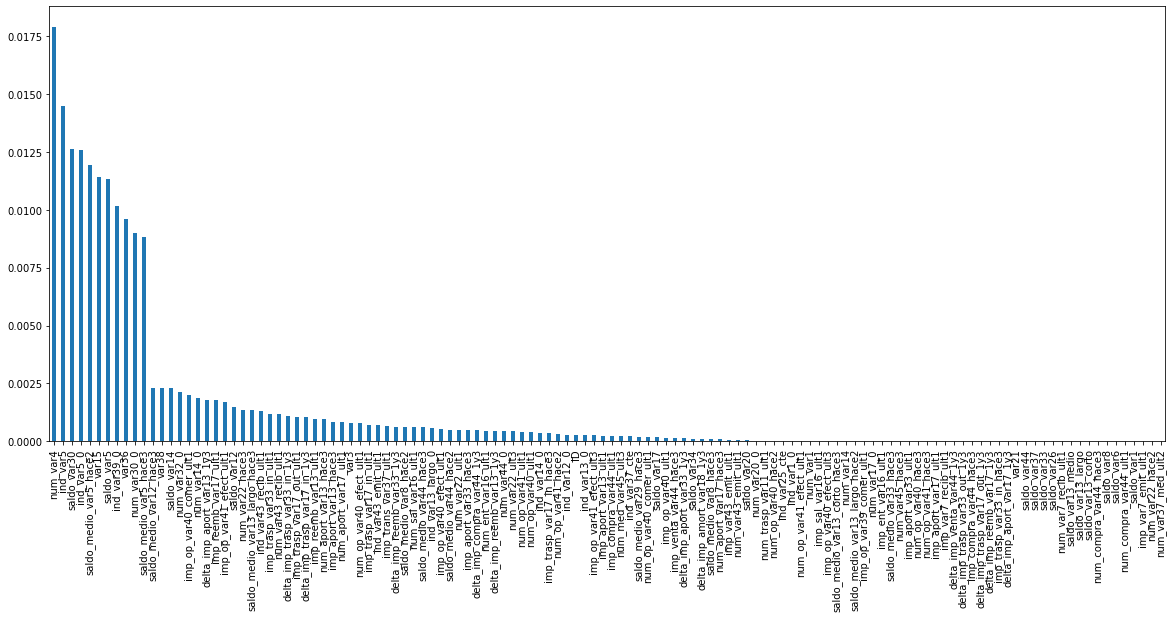

In [211]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Comparatively, we can see that there are a few features (left of the plot) that seem to contribute the most to predicting the target.There are also a few features with almost zero MI values on the right of the plot.

As I explained in the previous lecture, where to put the cut-off to select features is arbitrary. One could choose a certain value of MI after studying the plot above. An alternative and most frequent way of selecting features is to select the top 10, or top 20 features, or the features in the the top 10th percentile of the MI value distribution.

To do this, you can use mutual info in combination with SelectKBest or SelectPercentile from sklearn. SelectKBest allows you to determine how many features, and SelectPercentile the features within a certain percentile. See below.

In [212]:
# here I will select the top 10 features
# which are shown below
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['var15', 'ind_var5_0', 'ind_var5', 'ind_var39_0', 'num_var4', 'saldo_var5', 'saldo_var30', 'var36', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3'], dtype='object')

I have not personally used mutual information in any of my projects. However, there is some value in the method. See for example:

Comparison between univariate and mutual information selection in [sklean website](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)

In addition, mutual information has been widely covered, if anything else from a theoretical perspective, in several articles that I share in the additional reading resources section. Therefore I wanted to have it covered in the course, and I leave it up to you to explore it and see if you find any use in it.

That is all for this lecture, I hope you enjoyed it and see you in the next one!

## 3.2. Pearson Correlation

#### Calculate correlation

In [324]:
cor_list = []
feature_name = X_train.columns.tolist()

for i in X_train.columns.tolist():
    cor = np.corrcoef(X[i], y)[0, 1]
    cor_list.append(cor)
cor_list = [0 if np.isnan(i) else i for i in cor_list]
cor_list = np.round(np.abs(cor_list),3)
cor_list

array([0.003, 0.004, 0.101, 0.   , 0.01 , 0.003, 0.019, 0.02 , 0.003,
       0.029, 0.021, 0.001, 0.002, 0.01 , 0.033, 0.135, 0.002, 0.001,
       0.038, 0.039, 0.019, 0.001, 0.02 , 0.007, 0.005, 0.001, 0.008,
       0.012, 0.023, 0.01 , 0.009, 0.003, 0.006, 0.001, 0.002, 0.035,
       0.006, 0.08 , 0.004, 0.002, 0.003, 0.001, 0.001, 0.008, 0.001,
       0.011, 0.034, 0.   , 0.001, 0.014, 0.004, 0.022, 0.026, 0.015,
       0.004, 0.001, 0.002, 0.005, 0.037, 0.003, 0.004, 0.002, 0.103,
       0.008, 0.002, 0.001, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001,
       0.002, 0.001, 0.005, 0.021, 0.009, 0.001, 0.003, 0.002, 0.001,
       0.003, 0.002, 0.001, 0.002, 0.009, 0.004, 0.011, 0.001, 0.001,
       0.001, 0.002, 0.001, 0.001, 0.001, 0.001, 0.007, 0.021, 0.004,
       0.026, 0.003, 0.004, 0.003, 0.004, 0.004, 0.007, 0.01 , 0.003,
       0.025, 0.012, 0.002, 0.002, 0.001, 0.019, 0.021, 0.009, 0.002,
       0.017, 0.009, 0.001, 0.006, 0.02 , 0.016, 0.005, 0.003, 0.012,
       0.014, 0.012,

#### Set feature importances

In [325]:
cor_support = cor_list > cor_list.mean()
cor_support

array([False, False,  True, False, False, False,  True,  True, False,
        True,  True, False, False, False,  True,  True, False, False,
        True,  True,  True, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True,  True, False, False,
        True, False, False, False,  True,  True, False, False,  True,
        True,  True,

In [326]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(feature_name, cor_list), key=lambda x: x[1] * -1)
corr_features = pd.DataFrame(values, columns = headers)
corr_features[0:10]

,name,score
0,ind_var5,0.135
1,var36,0.103
2,var15,0.101
3,num_var4,0.080
4,ind_var13_0,0.039
5,ind_var12_0,0.038
6,saldo_var30,0.037
7,ind_var39_0,0.035
8,num_var30_0,0.034
9,ind_var5_0,0.033


## 3.3. Single AUC for each variable

In [327]:
auc_list = []
feature_name = X_train.columns.tolist()

for i in feature_name:
        fpr, tpr, thresholds = metrics.roc_curve(np.array(y_train), np.array(X_train[i]))
        if metrics.auc(fpr, tpr)+0>0.5:
             z=metrics.auc(fpr, tpr)+0
        else:       
            z=1-metrics.auc(fpr, tpr)+0
        auc_list.append(z)

auc_support = np.array(auc_list) > np.array(auc_list).mean()
auc_support

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,

In [328]:
headers = ["name","score"]
values = sorted(zip(feature_name, auc_list), key=lambda x: x[1] * -1)
auc_features = pd.DataFrame(values, columns = headers)
auc_features[0:10]

,name,score
0,var15,0.697974
1,saldo_var30,0.696759
2,saldo_var5,0.680063
3,saldo_medio_var5_hace2,0.678032
4,saldo_medio_var5_hace3,0.671159
5,ind_var5,0.668151
6,num_var4,0.648105
7,var36,0.618132
8,var38,0.588095
9,num_var30_0,0.534178


## 3.4. Univariate roc-auc or mse

This procedure works as follows:

- First, it builds one decision tree per feature, to predict the target
- Second, it makes predictions using the decision tree and the mentioned feature
- Third, it ranks the features according to the machine learning metric (roc-auc or mse)
- It selects the highest ranked features

I will demonstrate how to select features based on univariate roc-auc or univariate mse information on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

In [329]:
from sklearn.tree import DecisionTreeClassifier

roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
rocauc_support = roc_values > np.array(roc_values).mean()
rocauc_support

array([ True,  True,  True, False, False,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,

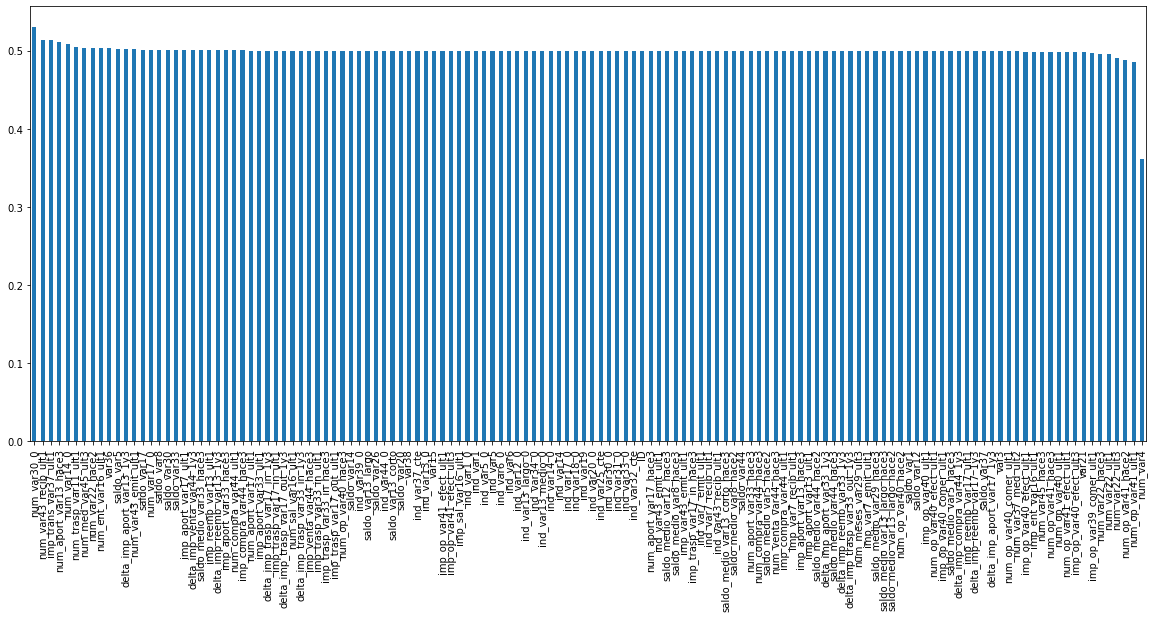

In [330]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [331]:
headers = ["name","score"]
values = sorted(zip(feature_name, roc_values), key=lambda x: x[1] * -1)
rocauc_features = pd.DataFrame(values, columns = headers)
rocauc_features[0:10]

,name,score
0,num_var30_0,0.530029
1,num_var43_recib_ult1,0.513342
2,imp_trans_var37_ult1,0.512943
3,num_aport_var13_hace3,0.510471
4,num_var14_0,0.507869
5,num_trasp_var11_ult1,0.504830
6,num_med_var45_ult3,0.503534
7,num_var22_hace2,0.503393
8,num_ent_var16_ult1,0.503083
9,var36,0.502990


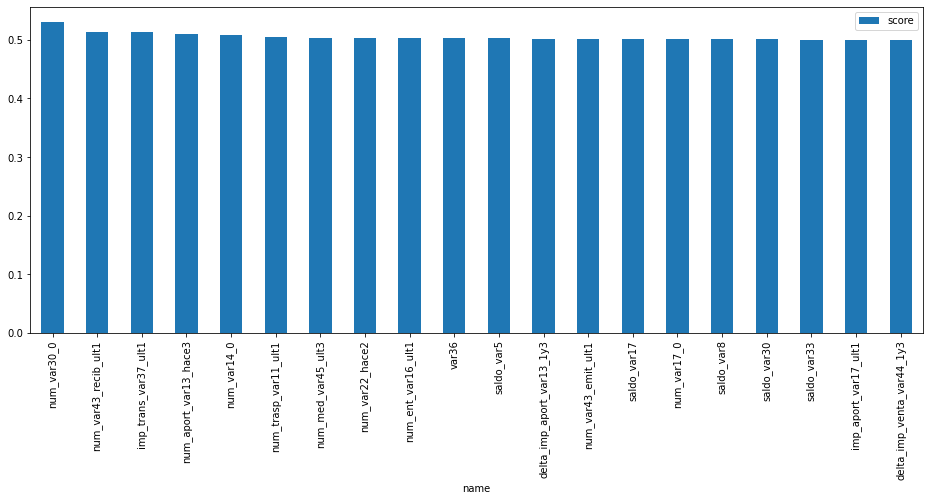

In [332]:

rocauc_features.sort_values('score',ascending=False)[0:20].plot.bar(figsize=(16, 6),x='name')

In [333]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(roc_values[roc_values > 0.5])

37

98 of 112  features show a predictive performance higher than 0.5. This means that we could remove 14 features from this dataset using this method.

You can of course tune the parameters of the Decision Tree and get better predictions. I leave this to you. But remember that the key here is not to make ultra predictive Decision Trees, rather to use them to screen quickly for important features. So I would recommend you don't spend too much time tuning. Doing cross validation with sklearn should be very straight forward  to get a more accurate measure of the roc-auc per feature.

Once again, where we put the cut-off to select features is a bit arbitrary, other than > 0.5. It will be up to you.

## 3.5. Fisher Score 

Compute chi-squared stats between each non-negative feature and class. 

- This score should be used to evaluate categorical variables in a classification task.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories. I explained this in more detail the introductory lecture of this section.

I will demonstrate how to select features using Fisher score using the titanic dataset from Kaggle.

### Chi-2

## 3.6. Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests (ANOVA). The methods based on F-test estimate the degree of linear dependency between two random variables. They assume a linear relationship between the feature and the target. These methods also assume that the variables follow a Gaussian distribution.

These may not always be the case for the variables in your dataset, so if looking to implement these procedure, you will need to corroborate these assumptions.

I will demonstrate how to select features based on univariate tests using sklearn on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

For the sake of the demonstration, I will assume that the variables show a linear relationship with the target, and that they are normally distributed. But when or if you choose to implement these selection procedure for your features, you will have to check that this is the case, to make sure you are implementing the right method.

### f_classif

In [334]:
# calculate the univariate statistical measure between
# each of the variables and the target
# similarly to chi2, the output is the array of f-scores
# and an array of pvalues, which are the ones we will compare

univariate = f_classif(X_train, y_train)

In [335]:
# let's add the variable names and order it for clearer visualisation
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

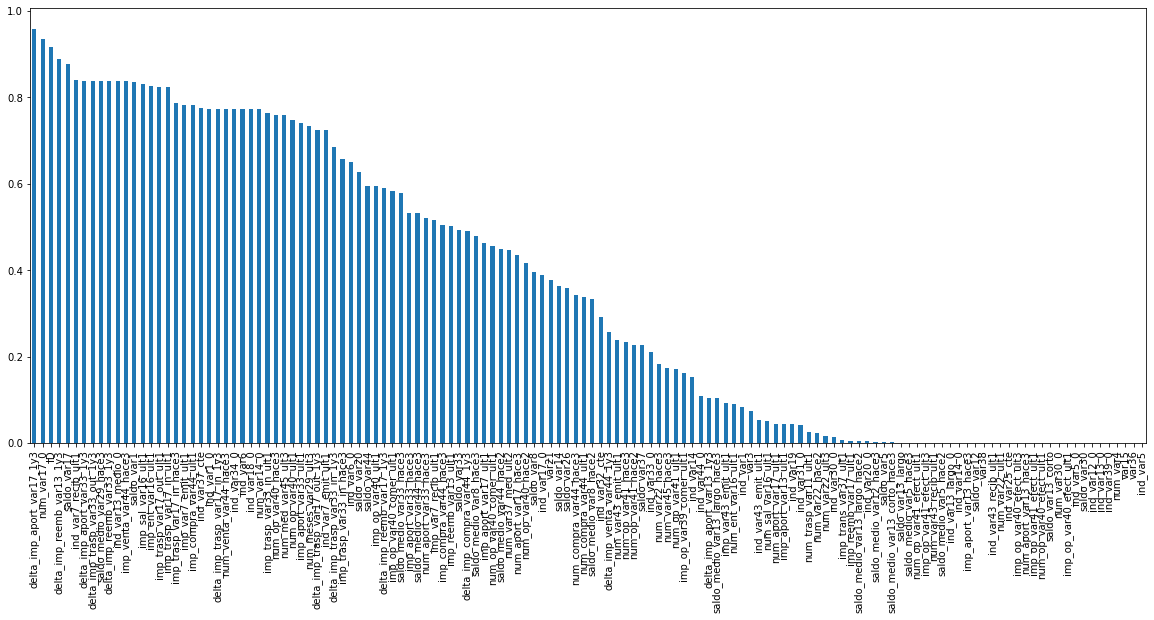

In [336]:
# and now let's plot the p values
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Remember that the lower the p_value, the most predictive the feature is in principle. There are a few features that do not seem to have predictive power according to this tests, which are those on the left with pvalues above 0.05. Given that typically in statistics one uses a pvalue of 0.05 as a cut-off, I am inclined to believe that those features with pvalue > 0.05 are indeed not important. However, keep in mind that this test assumes a linear relationship, so it might also be the case that the feature is related to the target but not in a linear manner.

Further investigation is needed if we want to know the true nature of the relationship between feature and target.

Similarly to what I mentioned in the previous lecture, in big datasets it is not unusual that the pvalues of the different features are really small. This does not say as much about the relevance of the feature. Mostly it indicates that it is a big the dataset.

Once again, where we put the cut-off to select features is a bit arbitrary. One way is to select the top 10, 20 features. Alternatively, the top 10th percentile. For this, you can use anova in combination with SelectKBest or SelectPercentile from sklearn. See below.

In [337]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


f_selector = SelectKBest(f_classif, k=20)
f_selector.fit_transform(X_train, y_train)
f_support = f_selector.get_support()
f_feature = X_train.loc[:,f_support].columns.tolist()
f_feature[0:10]

['var15',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var41_efect_ult1',
 'ind_var5_0',
 'ind_var5',
 'ind_var12_0',
 'ind_var13_0',
 'ind_var25_cte',
 'ind_var39_0']

In [338]:
# Variable Importance
feature_list = X_train.columns
# Get numerical feature importance
importance_list = list(f_selector.scores_)
# p value
pvalue_list = list(f_selector.pvalues_)

#get feature importances from the model
headers = ["name", "score", "pvalue"]
values = sorted(zip(feature_list, importance_list, pvalue_list))
values = sorted(values, key = lambda x: x[1], reverse = True)
f_features = pd.DataFrame(values, columns = headers)
f_features[0:10]

,name,score,pvalue
0,ind_var5,1045.336083,4.028057e-227
1,var36,617.265660,1.747577e-135
2,var15,545.339599,5.232711e-120
3,num_var4,379.330604,3.423327e-84
4,ind_var39_0,87.701100,7.899500e-21
5,ind_var13_0,87.603977,8.296405e-21
6,ind_var12_0,84.402366,4.177176e-20
7,saldo_var30,76.377541,2.409766e-18
8,ind_var5_0,56.480956,5.763192e-14
9,imp_op_var40_efect_ult1,56.166431,6.761773e-14


# 4. Step forward vs. Step backward

## 4.1. Step forward feature selection

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d.

Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria. In the second step, it evaluates all possible combinations of the selected feature and a second feature, and selects the pair that produce the best performing algorithm based on the same pre-set criteria.

The pre-set criteria can be the roc_auc for classification and the r squared for regression for example. 

This selection procedure is called greedy, because it evaluates all possible single, double, triple and so on feature combinations. Therefore, it is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

There is a special package for python that implements this type of feature selection: mlxtend.

In the mlxtend implementation of the step forward feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features. 

This is somewhat arbitrary because we may be selecting a subopimal number of features, or likewise, a high number of features. 

Here I will use the Step Forward feature selection algorithm from mlxtend in a classification (Paribas) and regression (House Price) dataset.

## 4.2. Step backward

In [10]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['v10', 'v14', 'v16', 'v33', 'v34', 'v36', 'v38', 'v39', 'v50', 'v59',
       'v70', 'v80', 'v85', 'v120', 'v129'],
      dtype='object')

# 4.3. Exhaustive feature selection
Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d.

In an exhaustive feature selection the best subset of features is selected, over all possible feature subsets, by optimizing a specified performance metric for a certain machine learning algorithm. For example, if the classifier is a logistic regression and the dataset consists of 4 features, the algorithm will evaluate all 15 feature combinations as follows:

all possible combinations of 1 feature
all possible combinations of 2 features
all possible combinations of 3 features
all the 4 features
and select the one that results in the best performance (e.g., classification accuracy) of the logistic regression classifier.

This is another greedy algorithm as it evaluates all possible feature combinations. It is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

There is a special package for python that implements this type of feature selection: mlxtend.

In the mlxtend implementation of the exhaustive feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features.

This is somewhat arbitrary because we may be selecting a subopimal number of features, or likewise, a high number of features.

Here I will use the Exhaustive feature selection algorithm from mlxtend in a classification (Paribas) and regression (House Price) dataset.

In [12]:
selected_feat= X_train.columns[list(efs1.best_idx_)]
selected_feat

Index(['v1', 'v2', 'v4'], dtype='object')

# 5. Embedded: Model-based selection techniques

In [339]:
# linear models benefit from feature scaling

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

X_train = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)

## 5.1. Lasso regularisation

Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting. In linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularisation, Lasso or l1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

I will demonstrate how to select features using the Lasso regularisation on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

In [340]:
# here I will do the model fitting and feature selection
# altogether in one line of code

# first I specify the Logistic Regression model, and I
# make sure I select the Lasso (l1) penalty.

# Then I use the selectFromModel object from sklearn, which
# will select in theory the features which coefficients are non-zero

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [341]:
# this command let's me visualise those features that were kept
sel_.get_support()

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False,  True, False,  True, False, False,
        True, False,  True, False, False,  True, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True,

In [342]:
# Now I make a list with the selected features
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 134
selected features: 38
features with coefficients shrank to zero: 0


In [343]:
# the number of features which coefficient was shrank to zero:
np.sum(sel_.estimator_.coef_ == 0)

0

In [344]:
# we can identify the removed features like this:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index([], dtype='object')

## 5.2. Logistic Regression Coefficients

Linear regression is a straightforward approach for predicting a quantitative response Y on the basis of a different predictor variable X1, X2, ... Xn. It assumes that there is a linear relationship between X(s) and Y. Mathematically, we can write this linear relationship as Y ≈ β0 + β1X1 + β2X2 + ... + βnXn.

**The magnitude of the coefficients is directly influenced by the scale of the features**. Therefore, to compare coefficients across features, it is importance to have all features within the same scale. This is why, normalisation is important for variable importance and feature selection in linear models. Normalisation is important as well for model performance.

In addition, Linear Regression makes the following assumptions over the predictor variables X:
- Linear relationship with the outcome Y
- Multivariate normality (X should follow a Gaussian distribution)
- No or little multicollinearity (Xs should not be linearly related to one another)
- Homoscedasticity (variance should be the same)

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables (Xs) and the dependent variable (Y)) is the same across all values of the independent variables.

Therefore, there are a lot of assumptions that need to be met in order to make a fair comparison of the features by using only their regression coefficients.

In addition, these coefficients may be penalised by regularisation, therefore being smaller than if we were to compare only that individual feature with the target.

Having said this, you can still select features based on linear regression coefficients, provided you keep all of these in mind at the time of analysing the outcome.

Personally, this is not my feature selection method of choice, although I find it useful to interpret the output of the model.


I will demonstrate how to select features based on the regression coefficients using sklearn on a classification problem, using the Paribas claims dataset from Kaggle.

In [354]:
# here I will do the model fitting and feature selection
# altogether in one line of code

# first I specify the Logistic Regression model, here I
# select the Ridge Penalty (l2)(it is the default parameter in sklearn)

# remember that here I want to evaluate the coefficient magnitud
# itself and not whether lasso shrinks coefficients to zero

# ideally, I want to avoid regularisation at all, so the coefficients
# are not affected (modified) by the penalty of the regularisation

# In order to do this in sklearn, I set the parameter C really by
# this is basically like fitting a non regularised logistic regression

# Then I use the selectFromModel object from sklearn
# to automatically select the features
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# set C to 1000, to avoid regularisation
sel_ = SelectFromModel(LogisticRegression(C=1000, penalty='l2')) 
sel_.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1000, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [355]:
# this command let's me visualise those features that were kept.

# sklearn will select those features which coefficients are greater
# than the mean of all the coefficients.

# it compares absolute values of coefficients. More on this in a second.

sel_.get_support()

array([False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,

In [356]:
# let's add the variable names and order it for clearer visualisation
# and then let's sum the number of selected features

selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

32

In [357]:
# the number of features which coefficient was shrank to zero
# is zero, as expected, because we are not making a regularised 
# regression (I set C too big, which is inversely proportional
# to the penaly).

np.sum(sel_.estimator_.coef_ == 0)

0

In [358]:
# as select from model selects coefficients above the mean
# of all coefficients, let's calculate first the mean

sel_.estimator_.coef_.mean()

-0.10211811946801021

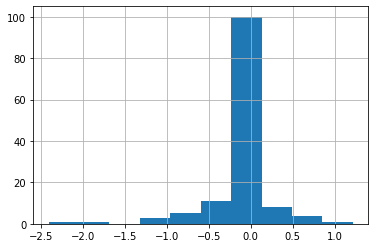

In [359]:
# and now let's plot the distribution of coefficients

pd.Series(sel_.estimator_.coef_.ravel()).hist()

As expected, some coefficients are positive and some are negative, suggesting that some features are negatively associated with the outcome (the more of the feature the less of the outcome) and viceversa.

However, the absolute value of the coefficients inform about the importance of the feature on the outcome, and not the sign. Therefore, the feature selection is done filtering on absolute values of coefficients. See below.

In [360]:
# the feature importance is informed by the absolute value of
# the coefficient, and not the sign.
# therefore, let's recalculate the mean using the absolute values instead

np.abs(sel_.estimator_.coef_).mean()

0.20132103669356557

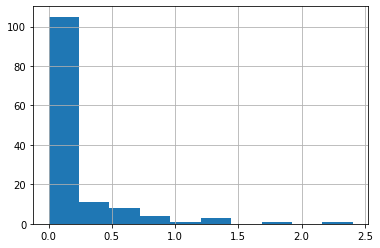

In [361]:
# and now let's plot the histogram of absolute coefficients

pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist()

In [362]:
# and now, let's compare the  amount of selected features
# with the amount of features which coefficient is above the
# mean coefficient, to make sure we understand the output of
# sklearn

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients greater than the mean coefficient: {}'.format(
    np.sum(np.abs(sel_.estimator_.coef_) > np.abs(sel_.estimator_.coef_).mean())))

total features: 134
selected features: 32
features with coefficients greater than the mean coefficient: 32


Therefore, we see how select from model works. It will select all the coefficients which absolute values are greater than the mean.
You can of course select a different threshold. Visit the documentation in sklearn to learn how to change this parameter.

This is all for this lecture. See you in the next one.

### Regression Coefficients are affected by regularisation

As I mentioned previously, regularisation applies a penalty on the coefficients, in order to reduce their influence and create models that generalise better. This is very good to improve  model performance. However, it masks the true relationship between the predictor X and the outcome Y. Let's explore why.

In [363]:
# I build 4 different models, from a highly regularised one
# to a non regularised one (C=1000)
coefs_df = []
for c in [1, 10, 100, 1000]:
    logit = LogisticRegression(C=c, penalty='l2')
    logit.fit(scaler.transform(X_train.fillna(0)), y_train)
    
    # store the coefficients of the variables in a list
    coefs_df.append(pd.Series(logit.coef_.ravel()))

In [364]:
# now I create a dataframe with the coefficients for all
# the variables for the 4 different logistic regression models

coefs = pd.concat(coefs_df, axis=1)
coefs.columns = [1, 10, 100, 1000]
coefs.index = X_train.columns
coefs.head()

,1,10,100,1000
ID,-0.001854,-0.001407,-0.001459,-0.000617
var3,0.270417,0.451939,0.490839,0.527561
var15,0.507043,0.507093,0.506356,0.506594
imp_ent_var16_ult1,0.014050,0.014075,0.014096,0.013627
imp_op_var39_comer_ult1,0.073429,0.071672,0.070866,0.071101


In [365]:
coefs.columns = np.log([1, 10, 100, 1000])
coefs.head()

,0.000000,2.302585,4.605170,6.907755
ID,-0.001854,-0.001407,-0.001459,-0.000617
var3,0.270417,0.451939,0.490839,0.527561
var15,0.507043,0.507093,0.506356,0.506594
imp_ent_var16_ult1,0.014050,0.014075,0.014096,0.013627
imp_op_var39_comer_ult1,0.073429,0.071672,0.070866,0.071101


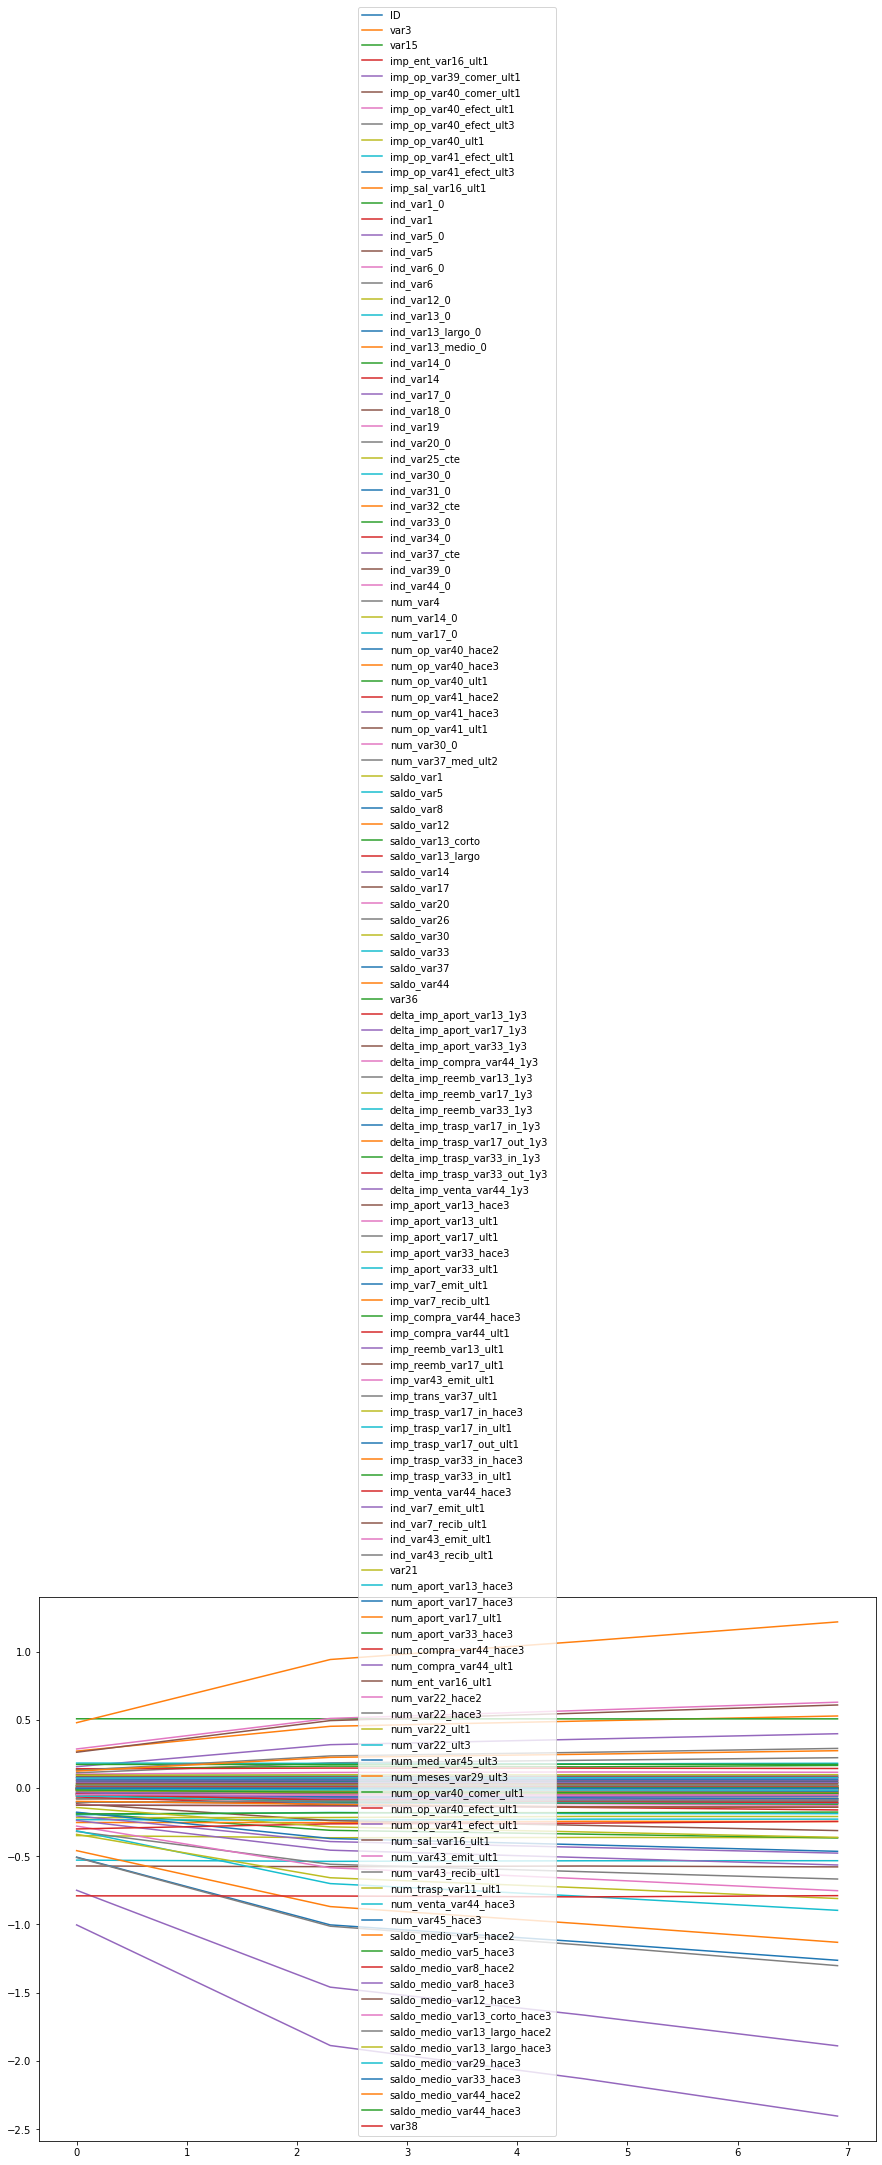

In [366]:
# plot the change in coefficients with the penalty
coefs.T.plot(figsize=(15,10))

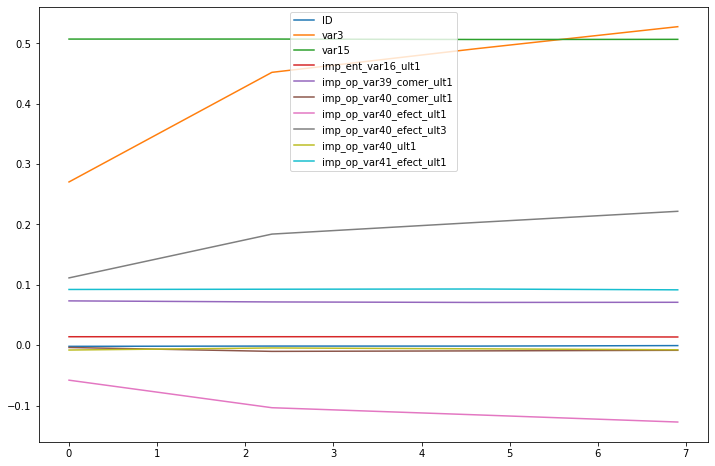

In [367]:
# now I will plot only the first 10 features for better
# visualisation

temp = coefs.head(10)
temp = temp.T
temp.plot(figsize=(12,8))

We can see that the relation among the coefficients is complex. Some features show bigger coefficients than others without regularisation, but when the penalty increases this relationship changes.

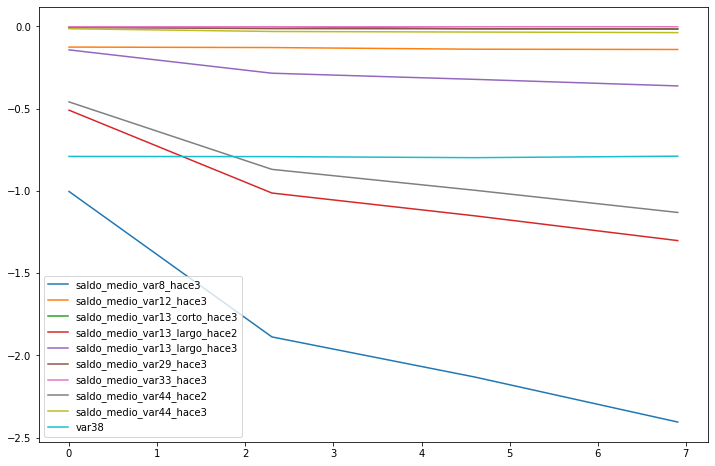

In [368]:
# plot another 10 features for visualisation
temp = coefs.tail(10)
temp = temp.T
temp.plot(figsize=(12,8))

Same as before, the relationship between features, as inferred from the coefficients, changes depending on the level of regularisation.

That is all for this demonstration, see you in the next one.

In [369]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), '1.15*median')
embeded_lr_selector.fit(X_train, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
embeded_lr_feature

['var3',
 'var15',
 'imp_op_var39_comer_ult1',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'ind_var5',
 'ind_var12_0',
 'ind_var13_0',
 'ind_var14_0',
 'ind_var17_0',
 'ind_var20_0',
 'ind_var30_0',
 'ind_var32_cte',
 'ind_var33_0',
 'ind_var37_cte',
 'ind_var44_0',
 'num_var4',
 'num_var17_0',
 'num_op_var40_hace2',
 'num_var30_0',
 'num_var37_med_ult2',
 'saldo_var5',
 'saldo_var8',
 'saldo_var12',
 'saldo_var17',
 'saldo_var26',
 'saldo_var30',
 'saldo_var44',
 'var36',
 'delta_imp_aport_var13_1y3',
 'delta_imp_aport_var17_1y3',
 'delta_imp_compra_var44_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_venta_var44_1y3',
 'imp_aport_var13_hace3',
 'imp_aport_var13_ult1',
 'imp_aport_var17_ult1',
 'imp_compra_var44_ult1',
 'imp_reemb_var13_ult1',
 'imp_reemb_var17_ult1',
 'imp_trasp_var17_in_ult1',
 'num_aport_var13_hace3',
 'num_aport_var17_hace3',
 'num_aport_var17_ult1',
 'num_compra_var44_ult1',
 'num_ent_var16_ult

## 5.3. Random Forest importance

Random forests are one the most popular machine learning algorithms. They are so successful because they provide in general a good predictive performance, low overfitting and easy interpretability. This interpretability is given by the fact that it is straightforward to derive the importance of each variable on the tree decision. In other words, it is easy to compute how much each variable is contributing to the decision.

Random forests consist of 4-12 hundred decision trees, each of them built over a random extraction of the observations from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations, and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. Each tree is also a sequence of yes-no questions based on a single or combination of features. At each node (this is at each question), the three divides the dataset into 2 buckets, each of them hosting observations that are more similar among themselves and different from the ones in the other bucket. Therefore, the importance of each feature is derived by how "pure" each of the buckets is. 

For classification, the measure of impurity is either the Gini impurity or the information gain/entropy. For regression the  measure of impurity is variance. Therefore, when training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.

To give you a better intuition, features that are selected at the top of the trees are in general more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gains.

**Note**
- Random Forests and decision trees in general give preference to features with high cardinality
- Correlated features will be given equal or similar importance, but overall reduced importance compared to the same tree built without correlated counterparts.

I will demonstrate how to select features based on tree importance using sklearn on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

In [370]:
# here I will do the model fitting and feature selection
# altogether in one line of code

# first I specify the Random Forest instance, indicating
# the number of trees

# Then I use the selectFromModel object from sklearn
# to automatically select the features

# SelectFrom model will select those features which importance
# is greater than the mean importance of all the features
# by default, but you can alter this threshold if you want to

sel_ = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [371]:
# this command let's me visualise those features that were selected.

# sklearn will select those features which importance values
# are greater than the mean of all the coefficients.

sel_.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False,

In [372]:
# let's make a list and count the selected features
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

17

In [373]:
selected_feat

Index(['ID', 'var15', 'imp_op_var41_efect_ult3', 'ind_var39_0', 'num_var4', 'saldo_var5', 'saldo_var30', 'var36', 'num_var22_hace2', 'num_var22_hace3', 'num_var22_ult1', 'num_var22_ult3', 'num_med_var45_ult3', 'num_var45_hace3', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'var38'], dtype='object')

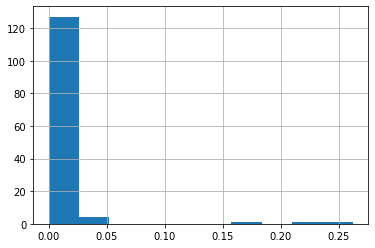

In [374]:
# and now let's plot the distribution of importances

pd.Series(sel_.estimator_.feature_importances_.ravel()).hist()

In [375]:
# and now, let's compare the  amount of selected features
# with the amount of features which importance is above the
# mean importance, to make sure we understand the output of
# sklearn

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients greater than the mean coefficient: {}'.format(
    np.sum(sel_.estimator_.feature_importances_ > sel_.estimator_.feature_importances_.mean())))

total features: 134
selected features: 17
features with coefficients greater than the mean coefficient: 17


You can of course tune the parameters of the Decision Tree.

Where we put the cut-off to select features is a bit arbitrary. One way is to select the top 10, 20 features. Alternatively, the top 10th percentile. 
For this, you can use mutual info in combination with SelectKBest or SelectPercentile from sklearn. See below.

In [376]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.15*median')
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
embeded_rf_feature

['ID',
 'var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var5_0',
 'ind_var5',
 'ind_var12_0',
 'ind_var13_0',
 'ind_var14_0',
 'ind_var25_cte',
 'ind_var30_0',
 'ind_var37_cte',
 'ind_var39_0',
 'num_var4',
 'num_var14_0',
 'num_op_var41_hace2',
 'num_op_var41_hace3',
 'num_op_var41_ult1',
 'num_var30_0',
 'num_var37_med_ult2',
 'saldo_var1',
 'saldo_var5',
 'saldo_var8',
 'saldo_var12',
 'saldo_var13_corto',
 'saldo_var14',
 'saldo_var26',
 'saldo_var30',
 'saldo_var37',
 'var36',
 'imp_aport_var13_hace3',
 'imp_aport_var13_ult1',
 'imp_var7_recib_ult1',
 'imp_var43_emit_ult1',
 'imp_trans_var37_ult1',
 'ind_var7_recib_ult1',
 'ind_var43_emit_ult1',
 'ind_var43_recib_ult1',
 'var21',
 'num_ent_var16_ult1',
 'num_var22_hace2',
 'num_var22_hace3',
 'num_var22_ult1',
 'num_var22_ult3',
 'num_med_var45_ult3',
 'num

## 5.4. LigthGBM

## 5.5. Gradient Boosted trees importance

Similarly to selecting features using Random Forests derived feature importance, you can select features based on the importance derived by gradient boosted trees. And you can do that in one go, or in a recursive manner, depending on how much time you have, how many features are in the dataset, and whether they are correlated or not.

I will demonstrate how to select features using Gradient boosted trees derived importance using sklearn on a classification problem, using the Paribas claims dataset from Kaggle.

In [378]:
# first I will select features all together in one go
# by contemplating their importance after fitting only
# 1 gradient boosted tree

sel_ = SelectFromModel(GradientBoostingClassifier())
sel_.fit(X_train, y_train)

SelectFromModel(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                     criterion='friedman_mse',
                                                     init=None,
                                                     learning_rate=0.1,
                                                     loss='deviance',
                                                     max_depth=3,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                               

In [379]:
# let's add the variable names and order it for clearer visualisation
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

13

In [380]:
selected_feat

Index(['ID', 'var15', 'imp_ent_var16_ult1', 'imp_op_var41_efect_ult1', 'ind_var30_0', 'num_var30_0', 'saldo_var5', 'saldo_var8', 'saldo_var30', 'num_var22_ult1', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'var38'], dtype='object')

In [ ]:
# next I will select features recursively for comparison

sel_ = RFE(GradientBoostingClassifier(), n_features_to_select=len(selected_feat))
sel_.fit(X_train, y_train)

In [ ]:
# let's add the variable names and order it for clearer visualisation
selected_feat_rfe = X_train.columns[(sel_.get_support())]
len(selected_feat_rfe)

In [ ]:
selected_feat_rfe

In [382]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

embeded_gbt_selector = SelectFromModel(GradientBoostingClassifier())
embeded_gbt_selector.fit(X_train, y_train)

embeded_gbt_support = embeded_gbt_selector.get_support()
embeded_gbt_feature = X_train.loc[:,embeded_gbt_support].columns.tolist()
embeded_gbt_feature

['ID',
 'var15',
 'imp_op_var41_efect_ult1',
 'ind_var30_0',
 'num_var30_0',
 'saldo_var5',
 'saldo_var8',
 'saldo_var30',
 'num_var22_ult1',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'var38']

## 5.6. Feature selection by random shuffling

A popular method of feature selection consists in random shuffling the values of a specific variable and determining how that permutation affects the performance metric of the machine learning algorithm. In other words, the idea is to permute the values of each feature, one at the time, and measure how much the permutation decreases the accuracy, or the roc_auc, or the mse of the machine learning model. If the variables are important, this is, highly predictive, a random permutation of their values will decrease dramatically any of these metrics. Contrarily, non-important / non-predictive variables, should have little to no effect on the model performance metric we are assessing.

I will demonstrate how to select features based on random shuffling using on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

**Note** For the demonstration, I will continue to use Random Forests, but this method is useful for any machine learning algorithm. In fact, the importance of the features are determined specifically for the algorithm used. Therefore, different algorithms may return different subsets of important features.


In [383]:
# The first step to determine feature importance by feature shuffling
# is to build the machine learning model for which we want to 
# select features

# In this case, I will build Random Forests, but remember that 
# you can use this procedure for any other machine learning algorithm

# I build few and shallow trees to avoid overfitting
rf = RandomForestClassifier(
    n_estimators=50, max_depth=2, random_state=2909, n_jobs=4)

rf.fit(X_train, y_train)

# print roc-auc in train and testing sets
print('train auc score: ',
      roc_auc_score(y_train, (rf.predict_proba(X_train.fillna(0)))[:, 1]))
print('test auc score: ',
      roc_auc_score(y_test, (rf.predict_proba(X_test.fillna(0)))[:, 1]))

train auc score:  0.7747446918173615
test auc score:  0.4810589526723345


In [384]:
# in this cell, I will shuffle one by one, each feature of the dataset
# and then use the dataset with the shuffled variable to make predictions
# using the random forests I trained in the previous cell

# overall train roc-auc: using all the features
train_auc = roc_auc_score(y_train, (rf.predict_proba(X_train.fillna(0)))[:, 1])

# dictionary to capture the features and the drop in auc that they
# cause when shuffled
feature_dict = {}

# selection  logic
for feature in X_train.columns:
    X_train_c = X_train.copy()
    
    # shuffle individual feature
    X_train_c[feature] = X_train_c[feature].sample(frac=1).reset_index(
        drop=True)
    
    # make prediction with shuffled feature and calculate roc-auc
    shuff_auc = roc_auc_score(y_train,
                              (rf.predict_proba(X_train_c.fillna(0)))[:, 1])
    
    # save the drop in roc-auc
    feature_dict[feature] = (train_auc - shuff_auc)

In [385]:
# let's have a look at the generated dictionary
feature_dict

{'ID': 0.0,
 'var3': 0.00022378731191441403,
 'var15': 0.029134219503959335,
 'imp_ent_var16_ult1': 4.998446207937768e-06,
 'imp_op_var39_comer_ult1': 0.00014925657682174354,
 'imp_op_var40_comer_ult1': -4.729013233895074e-06,
 'imp_op_var40_efect_ult1': 4.531119359851843e-05,
 'imp_op_var40_efect_ult3': 2.696652438372027e-05,
 'imp_op_var40_ult1': 0.0,
 'imp_op_var41_efect_ult1': 0.0016021367261225272,
 'imp_op_var41_efect_ult3': 0.000729652366056377,
 'imp_sal_var16_ult1': 0.0,
 'ind_var1_0': 0.0,
 'ind_var1': 0.0,
 'ind_var5_0': 0.00013106985107458335,
 'ind_var5': 0.01143153474001879,
 'ind_var6_0': 0.0,
 'ind_var6': 0.0,
 'ind_var12_0': 0.0025253766840211966,
 'ind_var13_0': 0.0014511009625930438,
 'ind_var13_largo_0': 1.1729625162715251e-05,
 'ind_var13_medio_0': 0.0,
 'ind_var14_0': 0.0,
 'ind_var14': 0.0,
 'ind_var17_0': 0.0,
 'ind_var18_0': 0.0,
 'ind_var19': 0.0,
 'ind_var20_0': 3.855214226722303e-05,
 'ind_var25_cte': 0.0005627711564160087,
 'ind_var30_0': 0.0001213516824249

In [386]:
# Now I will transform the dictionary into a pandas dataframe
# for easy manipulation

feature_importance = pd.Series(feature_dict).reset_index()
feature_importance.columns = ['feature', 'auc_drop']
feature_importance.head()

,feature,auc_drop
0,ID,0.000000
1,var3,0.000224
2,var15,0.029134
3,imp_ent_var16_ult1,0.000005
4,imp_op_var39_comer_ult1,0.000149


In [387]:
# Now I will sort the dataframe according to the drop in performance
# caused by feature shuffling

feature_importance.sort_values(by=['auc_drop'], ascending=False, inplace=True)

In [388]:
# visualise the top 10 features that caused the major drop
# in roc-auc (aka model performance)

feature_importance.head(10)

,feature,auc_drop
37,num_var4,0.030608
2,var15,0.029134
122,saldo_medio_var5_hace3,0.020027
58,saldo_var30,0.016629
121,saldo_medio_var5_hace2,0.013209
133,var38,0.013065
15,ind_var5,0.011432
49,saldo_var5,0.009508
46,num_var30_0,0.003127
18,ind_var12_0,0.002525


In [389]:
# visualise the features that caused virtually 
# no drop in performance

feature_importance.tail(10)

,feature,auc_drop
59,saldo_var33,0.000000
57,saldo_var26,0.000000
56,saldo_var20,0.000000
54,saldo_var14,0.000000
53,saldo_var13_largo,0.000000
67,delta_imp_reemb_var13_1y3,0.000000
5,imp_op_var40_comer_ult1,-0.000005
86,imp_var43_emit_ult1,-0.000034
113,num_op_var40_efect_ult1,-0.000130
35,ind_var39_0,-0.000798


In [390]:
# original number of features (rows in this case)
feature_importance.shape[0]

134

In [391]:
# number of features that cause a drop in performance
# when shuffled

feature_importance[feature_importance.auc_drop>0].shape[0]

47

Only 26 out of the 110 features caused a drop in the performance of the random forests when their values were permuted. This means that we could select those features and discard the rest, and should keep the original random forest performance.  

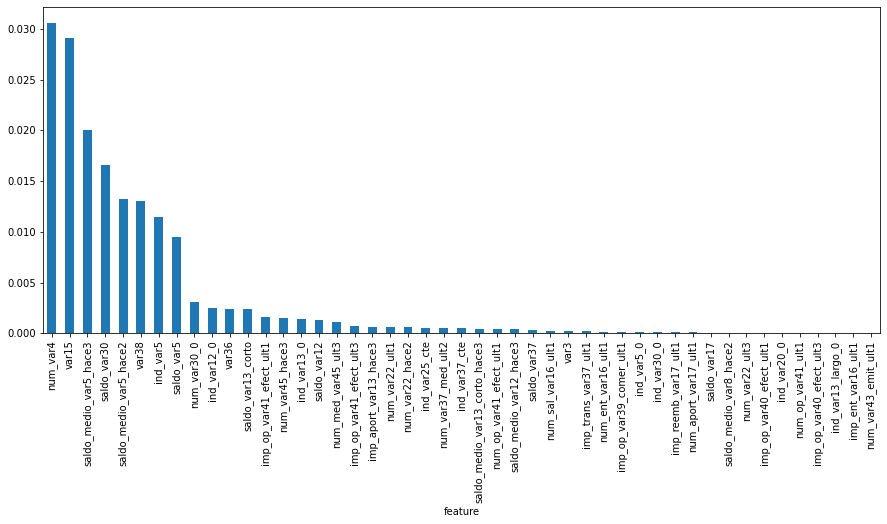

In [392]:
# and now let's plot the distribution of importances
# for those features that are actually important

# capture the important features in a series for visualisation
temp = pd.Series(feature_importance[feature_importance.auc_drop>0]['auc_drop'])
temp.index = pd.Series(feature_importance[feature_importance.auc_drop>0]['feature'])

pd.Series(temp).plot.bar(figsize=(15,6))

In [393]:
# Now let's build a random forests only with the 26 selected features

# capture the 26 selected features
selected_features = feature_importance[feature_importance.auc_drop>0]['feature']

# train a new random forests using only the selected features
rf = RandomForestClassifier(
    n_estimators=50, max_depth=2, random_state=2909, n_jobs=4)

rf.fit(X_train[selected_features].fillna(0), y_train)

# print roc-auc in train and testing sets
print('train auc score: ',
      roc_auc_score(y_train, (rf.predict_proba(X_train[selected_features].fillna(0)))[:, 1]))
print('test auc score: ',
      roc_auc_score(y_test, (rf.predict_proba(X_test[selected_features].fillna(0)))[:, 1]))

train auc score:  0.7882624089121442
test auc score:  0.49154046421473907


As you can see, the random forests with the selected features show a similar performance to the random forests built using all of the features. And yet, provides a simpler, faster and more reliable model, for implementation in a live scenario.

## 5.7. Tree based feature selection

In [394]:
len(importances)

NameError: name 'importances' is not defined

In [ ]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# 6. Wrapper

## 6.1. Recursive feature elimination with cross validation and Logistic Regression

In [395]:
strat_k_fold = 10
# Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=10,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

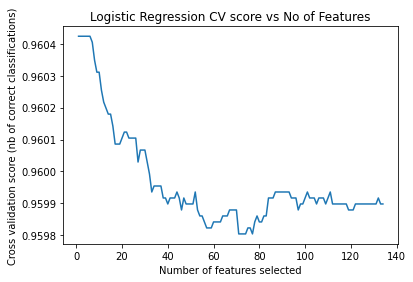

In [396]:
# plot grid_scores_
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [397]:
feature_importance = list(zip(X.columns, rfecv.support_))
rfecv_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        rfecv_features.append(value[0])        
print(rfecv_features)

['ind_var28_0']


In [398]:
rfecv_features[0:10]

['ind_var28_0']

## 6.2. Recursive feature elimination (RFE) with random forest

In [399]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=15, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)

Fitting estimator with 134 features.
Fitting estimator with 124 features.
Fitting estimator with 114 features.
Fitting estimator with 104 features.
Fitting estimator with 94 features.
Fitting estimator with 84 features.
Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.
Fitting estimator with 44 features.
Fitting estimator with 34 features.
Fitting estimator with 24 features.


RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=15, step=10, verbose=5)

In [400]:
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

15 selected features


In [401]:
rfe_feature

['ID',
 'var15',
 'imp_op_var41_efect_ult3',
 'num_var4',
 'saldo_var5',
 'saldo_var30',
 'var36',
 'num_var22_hace2',
 'num_var22_hace3',
 'num_var22_ult3',
 'num_med_var45_ult3',
 'num_var45_hace3',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'var38']

## Summary

In [402]:
len(feature_name)

134

In [405]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name,
                                     'Pearson':cor_support,
                                    'ROC-AUC':rocauc_support,
                                   # 'Chi-2':chi_support, 
                                    'RFE':rfe_support, 
                                    'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support,
                           #         'LightGBM':embeded_lgb_support,
                                    'Gradient Boosting Trees':embeded_gbt_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(30)

,Feature,Pearson,ROC-AUC,RFE,Logistics,Random Forest,Gradient Boosting Trees,Total
1,var38,True,True,True,True,True,True,6
2,var15,True,True,True,True,True,True,6
3,saldo_var5,True,True,True,True,True,True,6
4,saldo_var30,True,True,True,True,True,True,6
5,saldo_medio_var5_hace2,True,True,True,True,True,True,6
6,var36,True,True,True,True,True,False,5
7,saldo_medio_var5_hace3,True,True,True,False,True,True,5
8,num_var30_0,True,True,False,True,True,True,5
9,imp_op_var41_efect_ult3,True,True,True,True,True,False,5
10,imp_op_var41_efect_ult1,True,True,False,True,True,True,5


In [ ]:
np.array(feature_selection_df[feature_selection_df.Total > 1].Feature)